In [154]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import lxml
import html5lib

In [155]:
req = requests.get("http://afltables.com/afl/stats/teams/richmond.html")

In [156]:
soup = BeautifulSoup(req.text, 'lxml')

In [157]:
html_cols = soup.findAll('tr')[0].findAll('th')
col_names = [html_cols[i].text for i in range(len(html_cols))]

In [158]:
lines = []
lines.append(col_names)

In [159]:
html_rows = soup.findAll('tr')[1::]

In [160]:
for i in range(len(html_rows)-1):
    #row = dict([(i,x.text) for x in html_rows[i].findAll('td')])
    row = html_rows[i].findAll('td')
    row_list = [x.text if x.text != '\xa0' else "" for x in row]
    lines.append(row_list)

In [161]:
','.join(lines[1]) + '\n'

'Bartlett, Kevin,403,8293,1086,858,9151,778,777,27,,,,,,931,856,160,,,,,,,\n'

In [162]:
with open("players.scsv","w") as outFile:
    out_lines = [';'.join(line) + '\n' for line in lines]
    outFile.writelines(out_lines)

In [163]:
players_df = pd.read_csv("players.scsv", delimiter=';', index_col="Player")

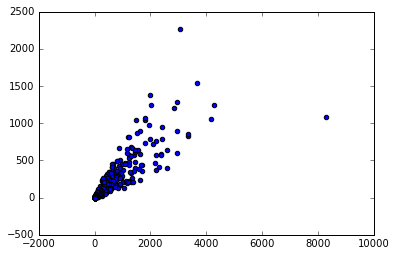

In [166]:
plt.scatter(players_df.KI, players_df.MK)
#players_df.KI